Accurate Scalling of Fourier Coefficients

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


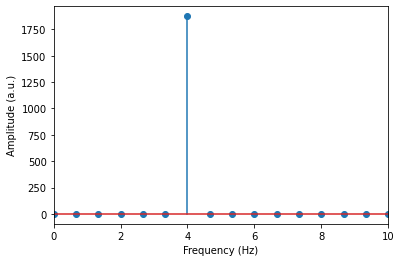

In [2]:
## incorrect amplitude units without normalizations

# create the signal
srate  = 1000 # hz
time   = np.arange(0.,1.5,1/srate)  # time vector in seconds
pnts   = len(time)   # number of time points
signal = 2.5 * np.sin( 2*np.pi*4*time )


# prepare the Fourier transform
fourTime = np.array(range(0,pnts))/pnts
fCoefs   = np.zeros(len(signal),dtype=complex)

for fi in range(0,pnts):
    # create complex sine wave and compute dot product with signal
    csw = np.exp( -1j*2*np.pi*fi*fourTime )
    fCoefs[fi] = np.sum( np.multiply(signal,csw) )


# extract amplitudes
ampls = np.abs(fCoefs);

# compute frequencies vector
hz = np.linspace(0,srate/2,num=math.floor(pnts/2.)+1)

plt.stem(hz,ampls[range(0,len(hz))])
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude (a.u.)')
plt.xlim(0,10)
plt.show()

Notice that even though the frequency is correctly shown (4Hz) viz what we specified. The Amplitude is not at all correct. (1900 instead of 2.5 (as we specified))

Appliying 1st Normalization: Division

#Reason: 
Dot product is more or less all additions & multiplications. By dividing no of points, we are actually averaging the Dot Product.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


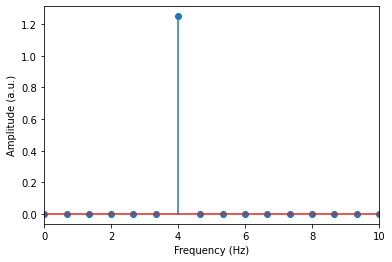

In [3]:
# create the signal
srate  = 1000 # hz
time   = np.arange(0.,1.5,1/srate)  # time vector in seconds
pnts   = len(time)   # number of time points
signal = 2.5 * np.sin( 2*np.pi*4*time )


# prepare the Fourier transform
fourTime = np.array(range(0,pnts))/pnts
fCoefs   = np.zeros(len(signal),dtype=complex)

for fi in range(0,pnts):
    # create complex sine wave and compute dot product with signal
    csw = np.exp( -1j*2*np.pi*fi*fourTime )
    fCoefs[fi] = np.sum( np.multiply(signal,csw) )

fCoefs = fCoefs/pnts    #Normalization by Division

# extract amplitudes
ampls = np.abs(fCoefs);

# compute frequencies vector
hz = np.linspace(0,srate/2,num=math.floor(pnts/2.)+1)

plt.stem(hz,ampls[range(0,len(hz))])
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude (a.u.)')
plt.xlim(0,10)
plt.show()

Even though this isn't the correct value, it is way nearer than without any normalizaiton.

Observe Closely, it is actually 1.25 viz half of the actual value of amplitude (2.5).  What has happened here is that energy (hence amplitude) has got a split of half into positive & negative frequecny values. 

Hence, applying 2nd normalization: Doubling

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


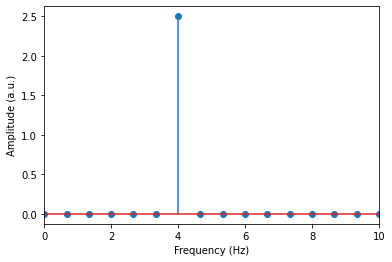

In [4]:
# create the signal
srate  = 1000 # hz
time   = np.arange(0.,1.5,1/srate)  # time vector in seconds
pnts   = len(time)   # number of time points
signal = 2.5 * np.sin( 2*np.pi*4*time )


# prepare the Fourier transform
fourTime = np.array(range(0,pnts))/pnts
fCoefs   = np.zeros(len(signal),dtype=complex)

for fi in range(0,pnts):
    # create complex sine wave and compute dot product with signal
    csw = np.exp( -1j*2*np.pi*fi*fourTime )
    fCoefs[fi] = np.sum( np.multiply(signal,csw) )

fCoefs = 2*fCoefs/pnts    #Normalization by Division

# extract amplitudes
ampls = np.abs(fCoefs);

# compute frequencies vector
hz = np.linspace(0,srate/2,num=math.floor(pnts/2.)+1)

plt.stem(hz,ampls[range(0,len(hz))])
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude (a.u.)')
plt.xlim(0,10)
plt.show()

Now we have got the desired result.

Though is isn't accurate as we have multiplied the amplitudes of Positive Frequencies twice instead of actually adding the negative frequency amplitudes.This is alright until we value any value at zero (DC) as it will be doubled too.